In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.15.0'

In [0]:
mnist = tf.keras.datasets.mnist # 28 x 28 image pf hand-written digits, 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<function matplotlib.pyplot.show>

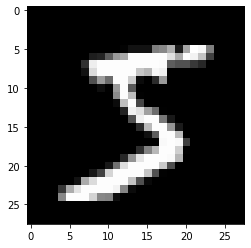

In [4]:
import matplotlib.pyplot as plt
#print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary_r)
plt.show

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [0]:
model = tf.keras.models.Sequential() # Most Common Model
model.add(tf.keras.layers.Flatten())
# Input layer, Flattened
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # Hidden layer 1, 128 neurons, with relu activation ( default firing mode )
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # Hidden layer 2
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # Output layer, softmax activation for probability distribution

In [7]:
model.compile(optimizer='adam', # Default Optimizer
              loss='sparse_categorical_crossentropy', # Default Loss
              metrics = ['accuracy']) # Because we want to track accuracy
model.fit(x_train,y_train, epochs = 3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2640 - acc: 0.9236
Epoch 2/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1058 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0730 - acc: 0.9769


In [8]:
val_loss, val_acc = model.evaluate( x_test, y_test)
print(val_loss, val_acc) # What we dont want to be happened, if both values nearly the same, or the delta values is more bigger because it show that our model are overfitted

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0974 - acc: 0.9701
0.09736251216614619 0.9701


In [0]:
#model.save('number_reader1')

In [0]:
#new_model = tf.keras.models.load_model('number_reader1')

In [0]:
prediction = model.predict([x_test])

In [12]:
print(prediction)

[[3.32963168e-07 1.58335638e-07 8.26011674e-05 ... 9.99860406e-01
  8.14853649e-07 2.87504395e-06]
 [6.50600152e-09 7.20953802e-04 9.99274790e-01 ... 8.36150260e-10
  6.55100649e-08 4.29954791e-13]
 [3.01528864e-08 9.99783456e-01 2.52099653e-05 ... 6.35380420e-05
  1.00340352e-04 2.63832174e-08]
 ...
 [1.88800531e-09 2.52969380e-06 1.39098006e-07 ... 2.28588160e-05
  6.75030969e-06 8.66839197e-04]
 [1.56152710e-05 6.52003109e-08 1.01043997e-06 ... 6.32892750e-07
  1.43993122e-03 4.07686400e-08]
 [7.04360517e-08 1.04712875e-07 3.99974215e-06 ... 3.83967497e-10
  2.53582726e-07 1.33923783e-09]]


In [13]:
import numpy as np
print(np.argmax(prediction[0]))

7


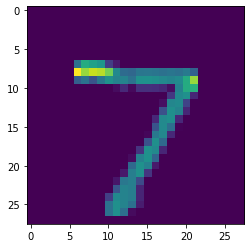

In [14]:
plt.imshow(x_test[0])
plt.show()